#Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Importing Data


In [2]:
# Read Dataset
df = pd.read_excel('/content/drive/MyDrive/[01] Daus/Time Series/Mini Project/MSIB Kalla Intern /Copy of brentcrudeoil.xlsx')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        758 non-null    datetime64[ns]
 1   Close       758 non-null    float64       
 2   chg(close)  758 non-null    float64       
 3   Low         758 non-null    float64       
 4   chg(low)    758 non-null    float64       
 5   High        758 non-null    float64       
 6   chg(high)   758 non-null    float64       
 7   Unnamed: 7  0 non-null      float64       
 8   Unnamed: 8  0 non-null      float64       
 9   Unnamed: 9  1 non-null      object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 59.3+ KB


In [3]:
# Cleaning
cleaned = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9']
df = df.drop(columns=cleaned)
df.head(10)

,Date,Close,chg(close),Low,chg(low),High,chg(high)
0,2021-01-04 23:57:59.904,50.23,50.23,49.97,49.97,51.88,51.88
1,2021-01-05 23:57:59.904,51.87,1.64,50.01,0.04,52.26,0.38
2,2021-01-06 23:57:59.904,52.02,0.15,51.21,1.20,52.37,0.11
3,2021-01-07 23:57:59.904,52.20,0.18,51.89,0.68,52.34,-0.03
4,2021-01-08 23:57:59.904,53.33,1.13,52.31,0.42,53.61,1.27
5,2021-01-11 23:57:59.904,53.33,0.00,52.66,0.35,53.48,-0.13
6,2021-01-12 23:57:59.904,54.12,0.79,53.35,0.69,54.23,0.75
7,2021-01-13 23:57:59.904,54.13,0.01,53.75,0.40,54.82,0.59
8,2021-01-14 23:57:59.904,54.43,0.30,53.68,-0.07,54.56,-0.26
9,2021-01-15 23:57:59.904,53.53,-0.90,52.97,-0.71,54.50,-0.06


In [4]:
# Convert the 'Date' column to datetime type
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2021-01-04 23:57:59.904000 to 2024-01-09 23:57:59.904000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       758 non-null    float64
 1   chg(close)  758 non-null    float64
 2   Low         758 non-null    float64
 3   chg(low)    758 non-null    float64
 4   High        758 non-null    float64
 5   chg(high)   758 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


<ipython-input-4-2a444b9ce1f0>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Date'] = pd.to_datetime(df['Date'])


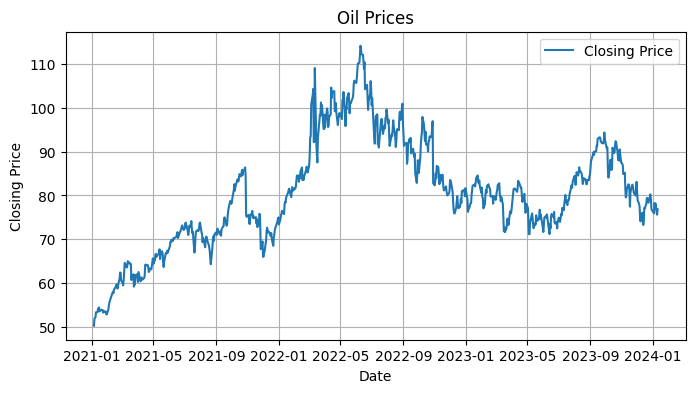

In [5]:
# Visualization of the graph
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Oil Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

#Moving Averages

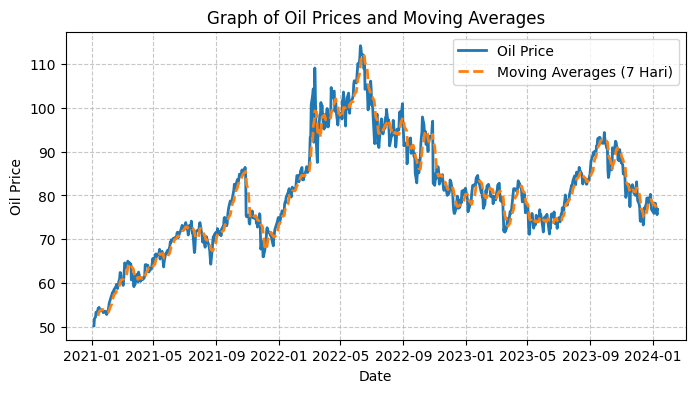

In [6]:
window_size = 7

# Calculate moving averages
df['MA'] = df['Close'].rolling(window=window_size).mean()

# Visualization
plt.figure(figsize=(8, 4))
plt.plot(df['Close'], label='Oil Price', linewidth=2)
plt.plot(df['MA'], label=f'Moving Averages ({window_size} Hari)', linestyle='--', linewidth=2)
plt.title('Graph of Oil Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Backward fill
df['MA'] = df['Close'].rolling(window=window_size).mean().fillna(method='bfill')

mae = mean_absolute_error(df['Close'], df['MA'])
rmse = mean_squared_error(df['Close'], df['MA'], squared=False)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 1.71
RMSE: 2.33


# Exponential Smoothing Model

In [8]:
# Handling NaN values
df.dropna(inplace=True)

# Implementation of Exponential Smoothing
model_es = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=7)
fit_model_es = model_es.fit()

# Create an index for predictions
predict_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Prediction using the Exponential Smoothing model
predict_es = fit_model_es.predict(start=len(df), end=len(df) + len(predict_index) - 1)

# Combine the prediction results with the corresponding indices
predict_series_es = pd.Series(predict_es.values, index=predict_index)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Predict Exponential Smoothing

In [9]:
print(predict_series_es)

2024-01-10 23:57:59.904    76.907453
2024-01-11 23:57:59.904    76.739502
2024-01-12 23:57:59.904    76.392967
2024-01-13 23:57:59.904    76.706398
2024-01-14 23:57:59.904    76.631949
2024-01-15 23:57:59.904    76.765298
2024-01-16 23:57:59.904    76.972895
2024-01-17 23:57:59.904    77.149433
2024-01-18 23:57:59.904    76.981482
2024-01-19 23:57:59.904    76.634947
2024-01-20 23:57:59.904    76.948378
2024-01-21 23:57:59.904    76.873929
2024-01-22 23:57:59.904    77.007278
2024-01-23 23:57:59.904    77.214875
2024-01-24 23:57:59.904    77.391413
2024-01-25 23:57:59.904    77.223463
2024-01-26 23:57:59.904    76.876927
2024-01-27 23:57:59.904    77.190358
2024-01-28 23:57:59.904    77.115909
2024-01-29 23:57:59.904    77.249258
2024-01-30 23:57:59.904    77.456856
2024-01-31 23:57:59.904    77.633394
2024-02-01 23:57:59.904    77.465443
2024-02-02 23:57:59.904    77.118907
2024-02-03 23:57:59.904    77.432339
2024-02-04 23:57:59.904    77.357890
2024-02-05 23:57:59.904    77.491239
2

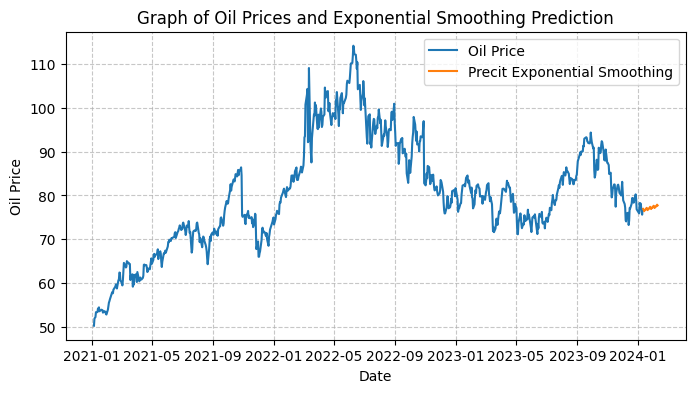

In [10]:
# Visualization
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Close'], label='Oil Price')
plt.plot(predict_series_es.index, predict_series_es, label='Precit Exponential Smoothing')
plt.title('Graph of Oil Prices and Exponential Smoothing Prediction')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

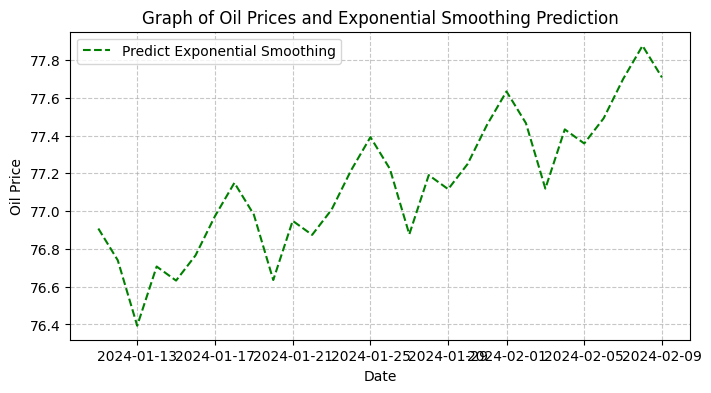

In [11]:
# Visualization of Prediction Results
plt.figure(figsize=(8, 4))
plt.plot(predict_series_es.index, predict_series_es, label='Predict Exponential Smoothing', linestyle='dashed', color='green')
plt.title('Graph of Oil Prices and Exponential Smoothing Prediction')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()